2019-June-05, Wednesday

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.karate_club_graph()

In [3]:
N = G.number_of_nodes()
M = G.number_of_edges()
print ("Number of nodes =", N)
print ("Number of edges =", M)

Number of nodes = 34
Number of edges = 78


#### Community structure:

I got which community which node is in from the following site:<br>
http://www1.ind.ku.dk/complexLearning/zachary1977.pdf

In [4]:
# The following community partition is what was observed empirically:

comm_a = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21}
comm_b = {9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}

comm_List = [comm_a, comm_b]

Check if there is any overlap between *comm_a* and *comm_b*:

In [5]:
comm_a & comm_b

set()

In [6]:
A = "red" #colour of one community in my viz.
B = "blue" #colour of the second community in my viz.

#The following is a list of colours of nodes, depending on their communities:
ColourList = [A,A,A,A,A,A,A,A,A,B,
              A,A,A,A,B,B,A,A,B,A,
              B,A,B,B,B,B,B,B,B,B,
              B,B,B,B]

---

In [7]:
DegSeq = np.array([G.degree(v) for v in G.nodes()]) #Degree sequence.

In [8]:
#Min, mean, max degree:
np.min(DegSeq), np.mean(DegSeq), np.max(DegSeq)

(1, 4.588235294117647, 17)

In [9]:
NodeSize = DegSeq*300/10 #List of node sizes.

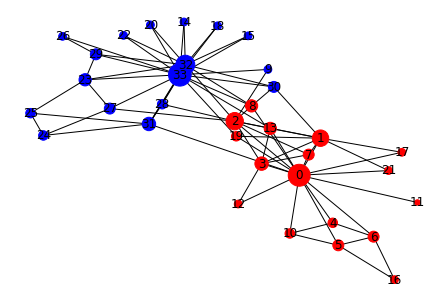

In [10]:
nx.draw_spring(G, with_labels=True, node_color=ColourList, node_size=NodeSize)

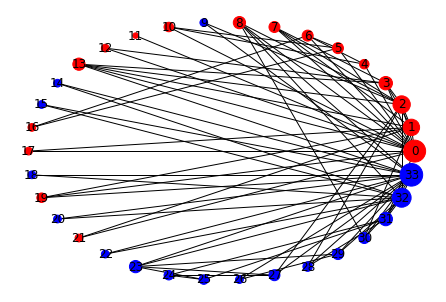

In [11]:
nx.draw_shell(G, with_labels=True, node_color=ColourList, node_size=NodeSize)

---

#### Calculate modularity:

In [12]:
def CommunityKronecker(comm_List, v, w):
    #comm_List = list of all communities. THIS MUST BE A LIST OF SETS!
    #v, w = nodes
    #This function checks in nodes v and w are both in the same community.
    
    if type(comm_List)!=list:
        return ("Dude, the list of communities, ie comm_List, you gave to this function is NOT A LIST! CHECK!")
    else:
        KronDelta = 0

        for comm in comm_List:
            if (v in comm) and (w in comm):
                KronDelta += 1
                #print (v, w, comm)

        if KronDelta>1:
            print ("Error! Some node appears in 2 different communities! Check!")
        else:
            return (KronDelta)

In [13]:
%%time
B = nx.modularity_matrix(G)
NetMod = 0
for v in G.nodes():
    for w in G.nodes():
        NetMod += B[v, w] * CommunityKronecker(comm_List, v, w)
NetMod = NetMod/(2*M)

CPU times: user 7.81 ms, sys: 1.56 ms, total: 9.37 ms
Wall time: 9.72 ms


In [14]:
print ("Modularity of Zachary karate club network, given the above graph partitioning is:")
print (NetMod)

Modularity of Zachary karate club network, given the above graph partitioning is:
0.3582347140039433
